In [1]:
from scholte import *
k_obs,f_obs=load_dispersion_observations()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
h0 =  [0.100, 0.005, 0.010, 0.02, 0.02, 0.02, 0.02, 0.0]
vs0 = [0.025, 0.050, 0.090, 0.1, 0.2, 0.2, 1.00]

In [15]:
do_mcmc_8param(k_obs,f_obs, h0, vs0, N = 10000, filename='three-modes.pickle', 
                   fixhalfspace=False,
                    step_size = 1e-3,
                    f_sensitivity = 0.05)

100%|██████████████████████████████████████████████████████████████████████████████| 10000/10000 [11:35<00:00, 14.38it/s]

Runtime was 695.6504641729989


In [16]:
import pickle
x = pickle.load(open('three-modes.pickle', 'rb'))
n = x.shape[0]
y = x[int(n/3):,:]
print(y.shape[0])
print(x.shape[0])

3635
5452


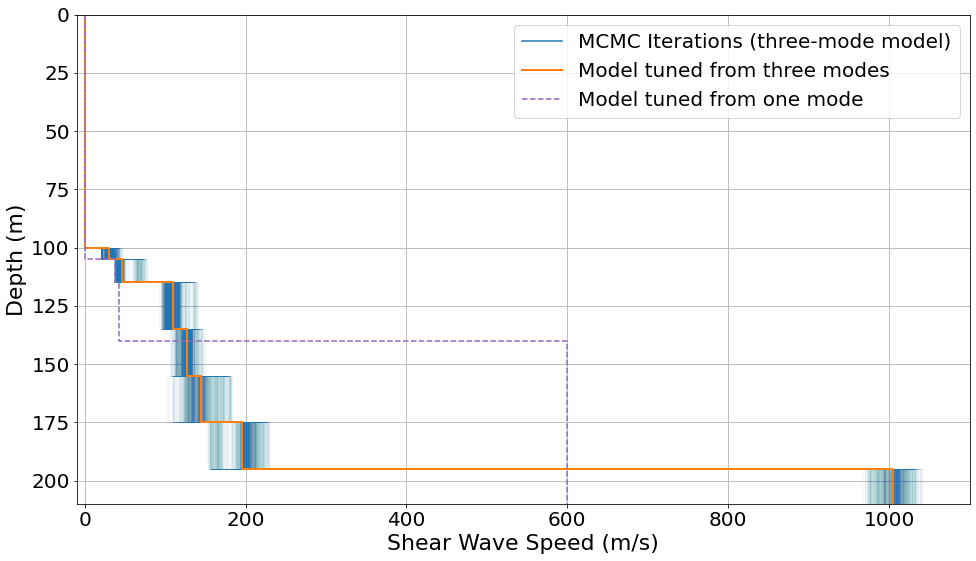

In [18]:
import numpy as np
ymean = np.mean(y,axis=0)

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig,ax=plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('w')
plt.plot(0,0,label='MCMC Iterations (three-mode model)')
for xx in y:
    plt.step(np.hstack([0,xx[8:],xx[14]]), 
             np.hstack([0,np.cumsum(xx[0:7]),300]),
             c='C0',alpha=0.01,linewidth=0.5)
    
plt.step(np.hstack([0,ymean[8:],ymean[-1]]), 
         np.hstack([0,np.cumsum(ymean[0:7]),300]),
         c='C1',linewidth=2,label='Model tuned from three modes')

# One-mode tuned model
h1 =  np.hstack([0,np.array([0.100, 0.005, 0.010, 0.025, 0.0])*1000,300])
v1 = [0,0, 0.038, 0.043, 0.080, 0.600,0.6]

plt.step(np.array(v1)*1000, 
         np.cumsum(h1),
         '--',c='C4',label='Model tuned from one mode')

plt.ylim([210,0])
plt.xlim([-10,1100])
plt.legend(fontsize=20)
plt.grid()
plt.ylabel('Depth (m)',fontsize=22)
plt.xlabel('Shear Wave Speed (m/s)',fontsize=22)
plt.show()

In [19]:
xmean = np.mean(x[:,8:],axis=0)
xstd  = np.std(x[:,8:],axis=0)
percent_change_from_initial_guess = (xmean/1e3 - vs0)/vs0*100
percent_change_from_initial_guess

array([ 26.32310389,  -8.93221791,  17.46068242,  23.72708854,
       -24.57740179,  -0.76197535,   0.8714588 ])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered 

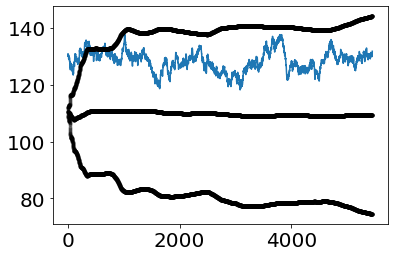

In [21]:
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')

weighted_average = 0
thickness = 0
n = 6
for i in range(n):
    weighted_average = weighted_average + x[:,8+i]*x[:,1+i]
    thickness = thickness + x[0,1+i]
weighted_average = weighted_average / thickness

plt.plot( weighted_average ) 

for i in range(x[:,8].shape[0]):
    m = np.mean(x[0:i,8:14])
    v = 0
    for j in range(8,15):
        v = np.var(x[0:i,j]) + v
    s=np.sqrt(v)
    plt.plot(i,m,'.k',alpha=0.25)
    plt.plot(i,m+s,'.k',alpha=0.25)
    plt.plot(i,m-s,'.k',alpha=0.25)

In [8]:
x[0,:]

array([ 100.,    5.,   10.,   20.,   20.,   20.,   20.,    0.,   25.,
         50.,   90.,  100.,  200.,  200., 1000.])

In [9]:
the_sum = x[0,1]*x[0,8]

In [10]:
x[0,1:6]

array([ 5., 10., 20., 20., 20.])